In [1]:
"""
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
"""

'\nhttps://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"] = 15, 6
from datetime import datetime

In [3]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
data["Month"] = pd.to_datetime(data["Month"])

In [7]:
data = data.set_index("Month")

In [8]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [9]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    
    # determining rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    # plot rolling stats
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and Rolling STD")
    plt.show(block=False)
    
    # perform dickey-fuller test
    print "Results of dickey-fuller test: "
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags used", "# observation used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    print dfoutput

/home/shreeranga/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
ts = data["#Passengers"]
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

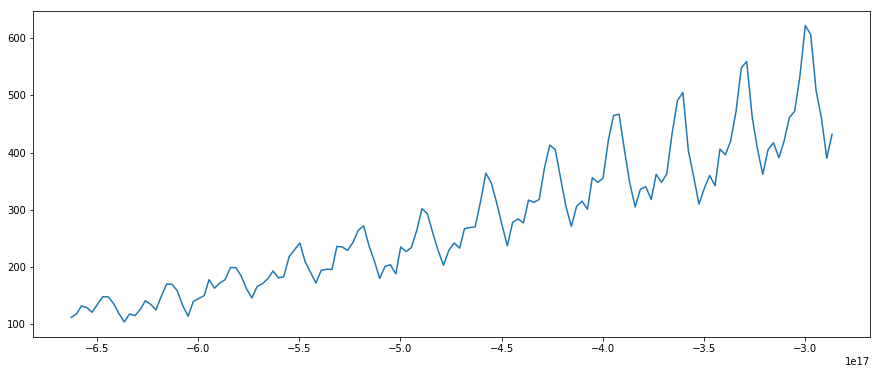

In [12]:
plt.plot(ts)

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


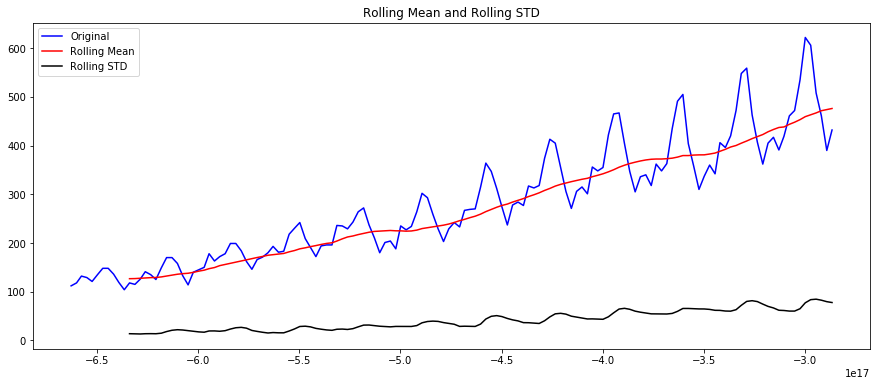

Results of dickey-fuller test: 
Test Statistic            0.815369
p-value                   0.991880
#Lags used               13.000000
# observation used      130.000000
Critical Value (5%)      -2.884042
Critical Value (1%)      -3.481682
Critical Value (10%)     -2.578770
dtype: float64


In [13]:
test_stationary(ts)

From the above table we can conclude that the time series data is not stationary. High p-value in df test.

### How to make the ts data almost stationary?

#### Estimating and elemenating tred

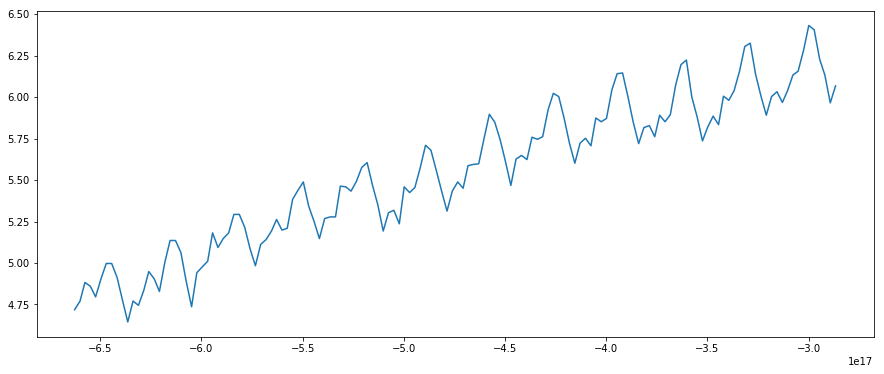

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


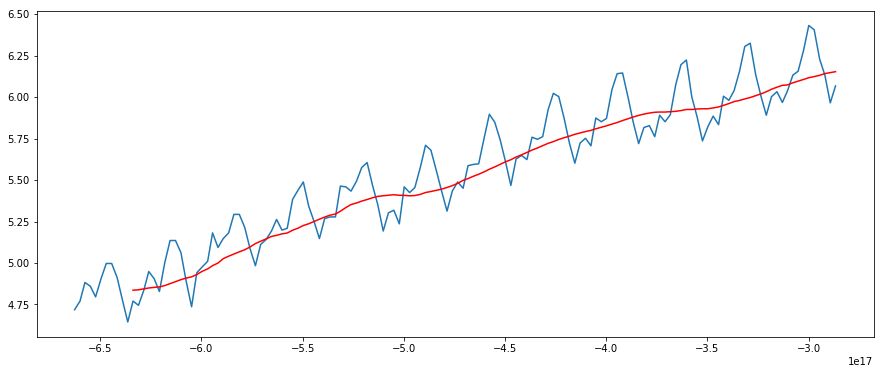

In [17]:
moving_avg = pd.rolling_mean(ts_log, 12)
plt.plot(ts_log)
plt.plot(moving_avg, color="red")

In [18]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


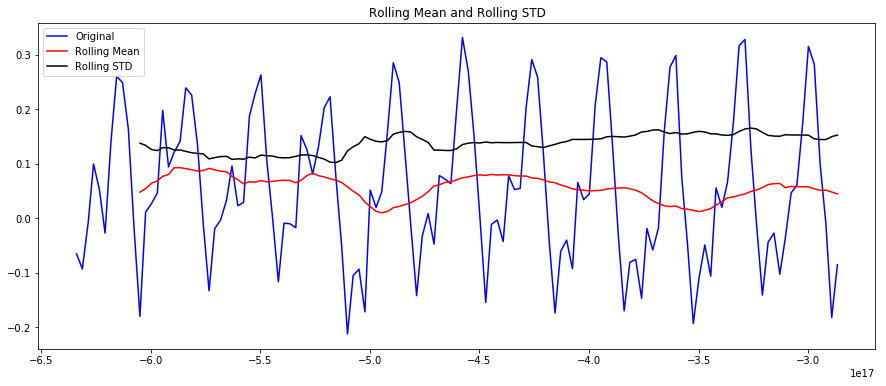

Results of dickey-fuller test: 
Test Statistic           -3.162908
p-value                   0.022235
#Lags used               13.000000
# observation used      119.000000
Critical Value (5%)      -2.886151
Critical Value (1%)      -3.486535
Critical Value (10%)     -2.579896
dtype: float64


In [19]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationary(ts_log_moving_avg_diff)

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


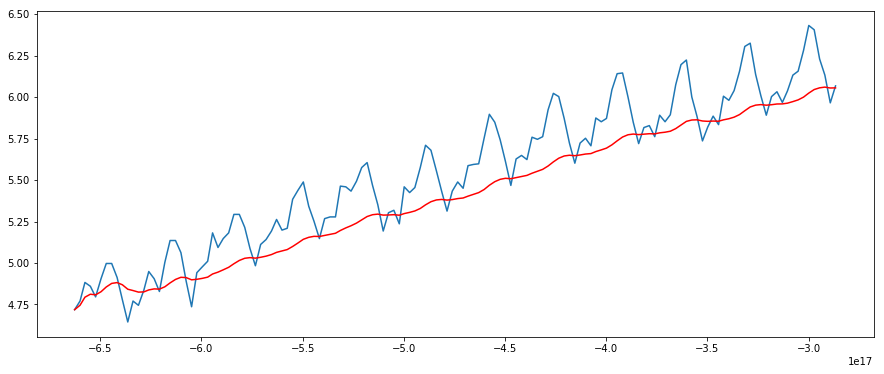

In [20]:
expweighted_avg = pd.ewma(ts_log,halflife=12)
plt.plot(ts_log)
plt.plot(expweighted_avg,color="red")

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


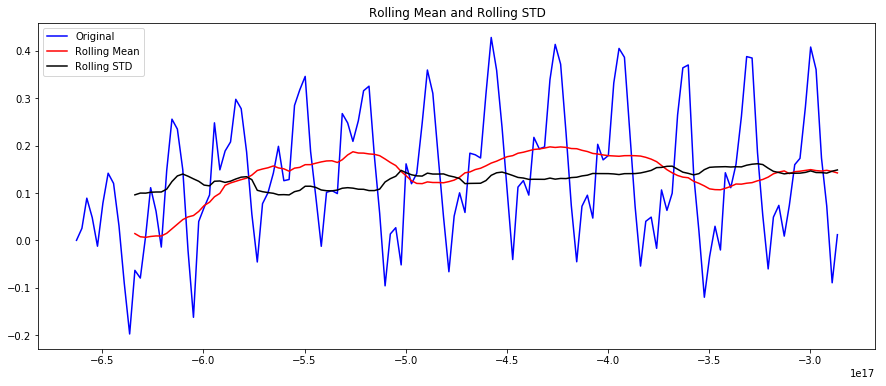

Results of dickey-fuller test: 
Test Statistic           -3.601262
p-value                   0.005737
#Lags used               13.000000
# observation used      130.000000
Critical Value (5%)      -2.884042
Critical Value (1%)      -3.481682
Critical Value (10%)     -2.578770
dtype: float64


In [21]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationary(ts_log_ewma_diff)

#### Eliminating trend and seasonality

Differencing

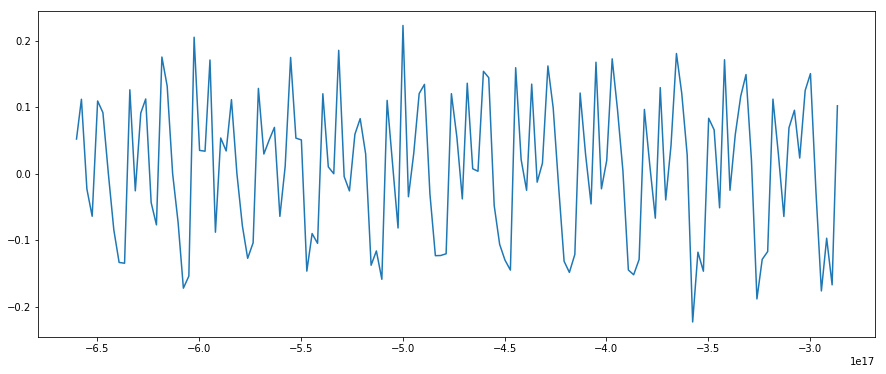

In [22]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


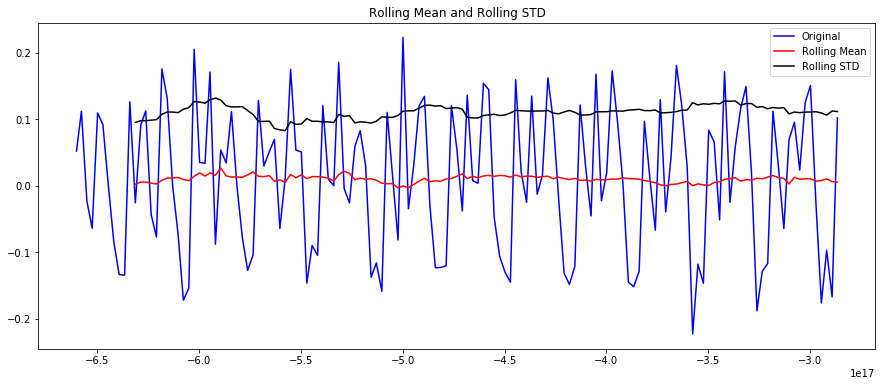

Results of dickey-fuller test: 
Test Statistic           -2.717131
p-value                   0.071121
#Lags used               14.000000
# observation used      128.000000
Critical Value (5%)      -2.884398
Critical Value (1%)      -3.482501
Critical Value (10%)     -2.578960
dtype: float64


In [24]:
ts_log_diff.dropna(inplace=True)
test_stationary(ts_log_diff)

Decomposing

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/home/shreeranga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


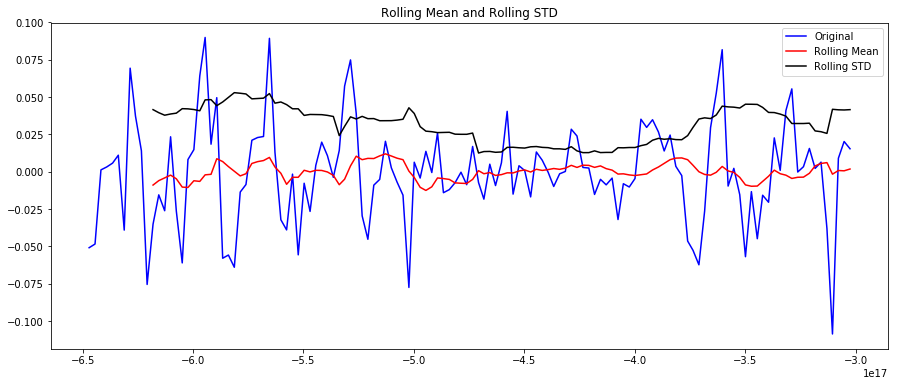

Results of dickey-fuller test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
#Lags used              9.000000e+00
# observation used      1.220000e+02
Critical Value (5%)    -2.885538e+00
Critical Value (1%)    -3.485122e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [27]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationary(ts_log_decompose)

In [ ]:
# todo - apply arima
# todo - apply random forest regressor